In [84]:
import pandas as pd  # manejo del análisis y de estructura de datos
import numpy as np  # cálculo numérico del análisis
import seaborn as sns  # creación gráfica de estadísticas
import matplotlib.pyplot as plt  # creación de las gráficas
import pandas as pd

# Librerías para implementar modelos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
import pandas as pd

# Cargar el dataset
datos = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\Titanic-Dataset.csv')
print(datos.head()) 




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [23]:
#lectura de datos 
datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
#Descrpcion de los datos 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
import pandas as pd

# Crear un DataFrame
datos = pd.DataFrame({'Age': [25, 30, 35, 40, None]})

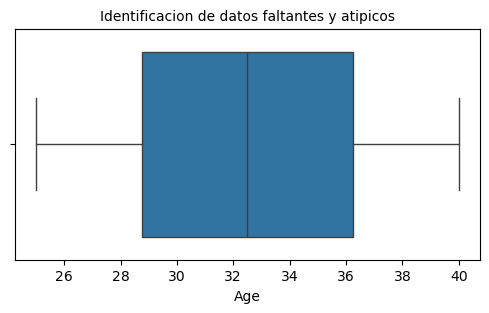

In [23]:
# Identificación de datos faltantes y atípicos de Age
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Age'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)
plt.show()

In [35]:
# Crear un DataFrame

datos = pd.DataFrame({'Survived': [25, 30, 35, 40, None]})

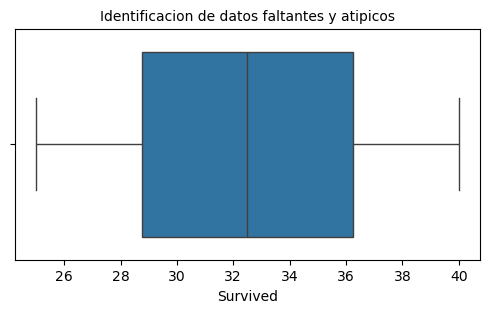

In [36]:
 #Identificación de datos faltantes y atípicos de Survived
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Survived'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)
plt.show()

In [41]:
# Cargar el dataset
df = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\Titanic-Dataset.csv')

In [45]:
# Remplazar todos los ceros con el valor medio promedio de la columna 
# Calcular la media de cada columna numérica (excluyendo los ceros)
columnas_numericas = ['Age', 'PassengerId', 'Survived', 'Pclass', 'Parch', 'Fare']
for columna in columnas_numericas:
    media = datos[columna].replace(0, np.nan).mean()
    datos[columna] = datos[columna].replace(0, media)

# Contar registros con cero (ahora considerando los valores reemplazados)
print("cantidad de registros con cero Age:", datos['Age'].isin([0]).sum())
print("cantidad de registros con cero PassengerId:", datos['PassengerId'].isin([0]).sum())
print("cantidad de registros con cero Survived:", datos['Survived'].isin([0]).sum())
print("cantidad de registros con cero Pclass:", datos['Pclass'].isin([0]).sum())
print("cantidad de registros con cero Parch:", datos['Parch'].isin([0]).sum())
print("cantidad de registros con cero Fare:", datos['Fare'].isin([0]).sum())
# Verificar si se aplicaron los cambios
print(datos.head())


cantidad de registros con cero Age: 0
cantidad de registros con cero PassengerId: 0
cantidad de registros con cero Survived: 0
cantidad de registros con cero Pclass: 0
cantidad de registros con cero Parch: 0
cantidad de registros con cero Fare: 0
   PassengerId  Survived  Pclass  \
0            1         1       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

      Parch            Ticket     Fare Cabin Embarked  
0  1.596244      

In [43]:
# revision de datos faltantes nuevamente 
print("cantidad de registros con cero Age:", datos['Age'].isin([0]).sum())
print("cantidad de registros con cero PassengerId:", datos['PassengerId'].isin([0]).sum())
print("cantidad de registros con cero Survived:", datos['Survived'].isin([0]).sum())
print("cantidad de registros con cero Pclass:", datos['Pclass'].isin([0]).sum())
print("cantidad de registros con cero Parch:", datos['Parch'].isin([0]).sum())
print("cantidad de registros con cero  Ticket:", datos['Ticket'].isin([0]).sum())


cantidad de registros con cero Age: 0
cantidad de registros con cero PassengerId: 0
cantidad de registros con cero Survived: 549
cantidad de registros con cero Pclass: 0
cantidad de registros con cero Parch: 678
cantidad de registros con cero  Ticket: 0


Text(0.5, 1.0, 'Identificacion de datos faltantantes y atipicos')

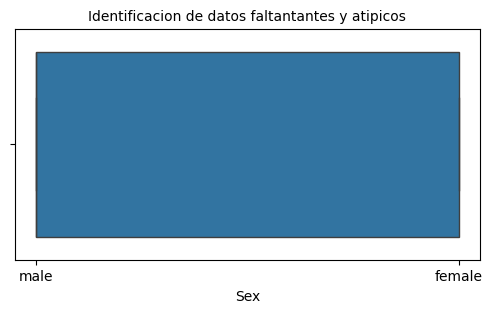

In [46]:
#Identificacion de datos faltantantes y atipicos de sex
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Sex'] )
plt.title('Identificacion de datos faltantantes y atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de datos faltantantes y atipicos')

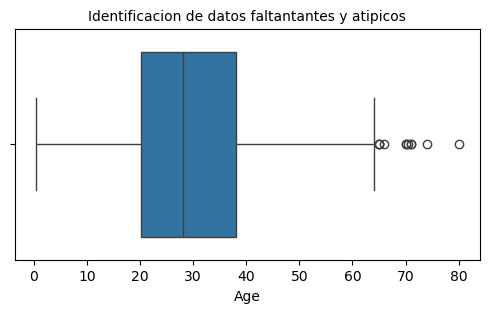

In [47]:
#Identificacion de datos faltantantes y atipicos de sex
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Age'] )
plt.title('Identificacion de datos faltantantes y atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de datos faltantantes y atipicos')

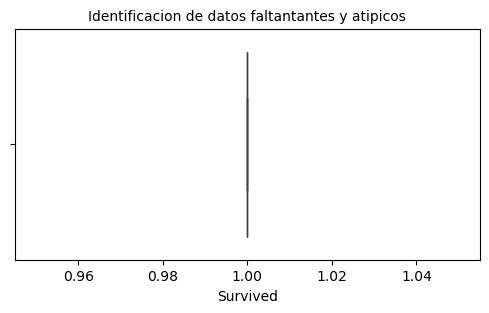

In [48]:
#Identificacion de datos faltantantes y atipicos de sex
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Survived'] )
plt.title('Identificacion de datos faltantantes y atipicos', fontsize=10 )

In [53]:
# Revsisiondel tipo de datos faltante 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [57]:
# Total de personas que sobrevieron al naufragio. 
datos['Survived'].value_counts()

Survived
1    891
Name: count, dtype: int64

In [60]:
datos[['Survived']].head(30)

,Survived
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [63]:
# Porcentaje de datos para entrenamiento (train) = 75%, para la prueba (test) = 25%
# Se crean las variables X y Y para almacenar la información
X = datos.drop('Survived', axis=1)  # se cargan los datos de train sin la columna Survived
Y = datos['Survived']  # se cargan los datos de train con la columna Survived

# La función train_test_split creará una división del conjunto de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)


In [65]:
print(X_train)


     PassengerId  Pclass                           Name     Sex   Age  SibSp  \
76            77       3              Staneff, Mr. Ivan    male   NaN      0   
21            22       2          Beesley, Mr. Lawrence    male  34.0      0   
839          840       1           Marechal, Mr. Pierre    male   NaN      0   
762          763       3          Barah, Mr. Hanna Assi    male  20.0      0   
214          215       3            Kiernan, Mr. Philip    male   NaN      1   
..           ...     ...                            ...     ...   ...    ...   
345          346       2  Brown, Miss. Amelia "Mildred"  female  24.0      0   
48            49       3            Samaan, Mr. Youssef    male   NaN      2   
786          787       3      Sjoblom, Miss. Anna Sofia  female  18.0      0   
718          719       3            McEvoy, Mr. Michael    male   NaN      0   
259          260       2    Parrish, Mrs. (Lutie Davis)  female  50.0      0   

        Parch   Ticket     Fare Cabin E

In [66]:
print(Y_train)

76     1
21     1
839    1
762    1
214    1
      ..
345    1
48     1
786    1
718    1
259    1
Name: Survived, Length: 668, dtype: int64


In [81]:
# Construir el modelo de regresión logística
if len(np.unique(Y_train)) > 1:
    modelo_regresion = LogisticRegression(solver="liblinear")
    modelo_regresion.fit(X_train, Y_train)

    # Crear el modelo de predicción
    Prediccion = modelo_regresion.predict(X_test)
    print("Prediccion:", Prediccion)
else:
    print("Error: Y_train debe contener al menos dos clases diferentes.")

Error: Y_train debe contener al menos dos clases diferentes.


In [72]:
print (Y_test)

32     1
248    1
151    1
826    1
19     1
      ..
554    1
574    1
594    1
555    1
275    1
Name: Survived, Length: 223, dtype: int64


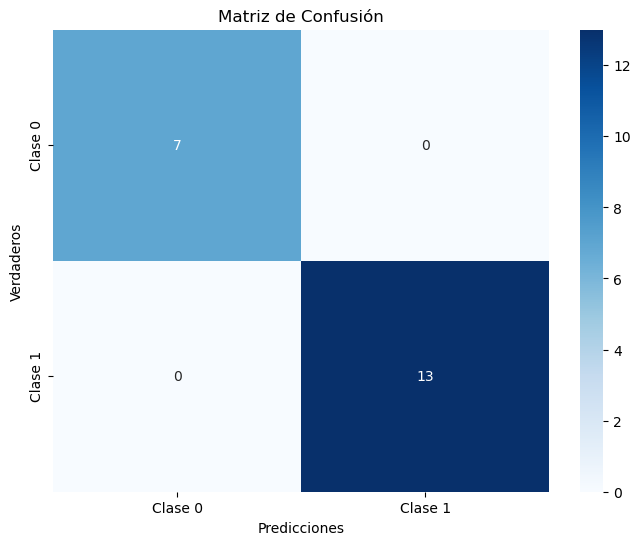

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_72\2326456210.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette='viridis')


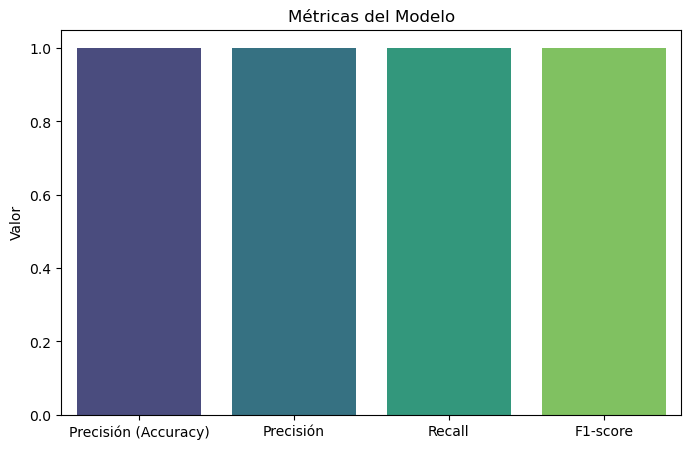

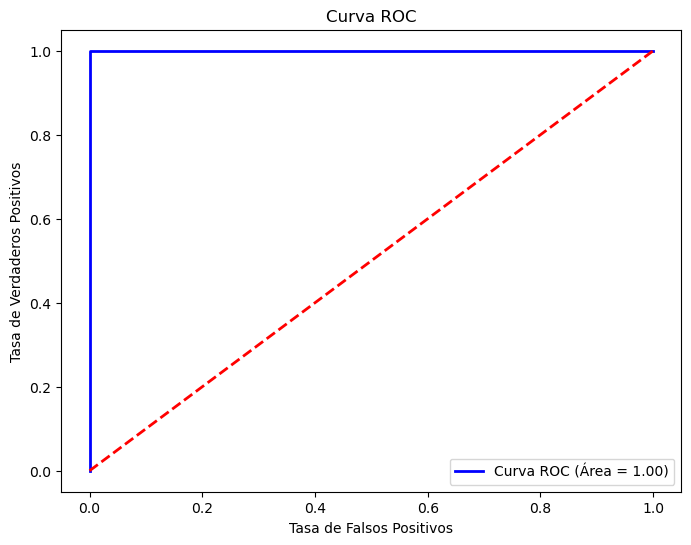

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

# Ejemplo de creación de un dataset con dos clases
X, Y = make_classification(n_samples=100, n_features=5, n_classes=2, n_informative=2, random_state=42)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)

# Crear el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, Prediccion)

# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.show()

# Evaluación de métricas
accuracy = accuracy_score(Y_test, Prediccion)
precision = precision_score(Y_test, Prediccion)
recall = recall_score(Y_test, Prediccion)
f1 = f1_score(Y_test, Prediccion)

# Gráfica de Precisión y Recall
metrics = [accuracy, precision, recall, f1]
metric_names = ['Precisión (Accuracy)', 'Precisión', 'Recall', 'F1-score']

plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metrics, palette='viridis')
plt.title('Métricas del Modelo')
plt.ylabel('Valor')
plt.show()

# Curva ROC
y_probs = modelo_regresion.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (Área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()